<a href="https://colab.research.google.com/github/bhuvaneswarignanasekar/chatbot-Deep-learning-/blob/main/dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [ ]:
data=pd.read_excel("/content/intent_chat.xlsx")

In [ ]:
data.head()

,Unnamed: 0,label,text,response
0,0,Greeting,Hi,"Hi human, please tell me your GeniSys user"
1,1,Greeting,Hi there,"Hello human, please tell me your GeniSys user"
2,2,Greeting,Hola,"Hola human, please tell me your GeniSys user"
3,3,GreetingResponse,My user is Adam,Great! Hi <HUMAN>! How can I help?
4,4,GreetingResponse,This is Adam,"Good! Hi <HUMAN>, how can I help you?"


In [ ]:
num_classes=len(data['label'].unique())
training_sentences=data['text']
responses=data['response']
training_labels=data['label']

In [ ]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 22)                374       
                                                                 
Total params: 16,918
Trainable params: 16,918
Non-trainable params: 0
__________________________________________________

In [ ]:
epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/500
3/3 [==============================] - 1s 5ms/step - loss: 3.0913 - accuracy: 0.0370
Epoch 2/500
3/3 [==============================] - 0s 6ms/step - loss: 3.0887 - accuracy: 0.0617
Epoch 3/500
3/3 [==============================] - 0s 6ms/step - loss: 3.0871 - accuracy: 0.1111
Epoch 4/500
3/3 [==============================] - 0s 5ms/step - loss: 3.0853 - accuracy: 0.0864
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 3.0840 - accuracy: 0.0864
Epoch 6/500
3/3 [==============================] - 0s 5ms/step - loss: 3.0825 - accuracy: 0.0864
Epoch 7/500
3/3 [==============================] - 0s 5ms/step - loss: 3.0810 - accuracy: 0.0864
Epoch 8/500
3/3 [==============================] - 0s 5ms/step - loss: 3.0798 - accuracy: 0.0864
Epoch 9/500
3/3 [==============================] - 0s 5ms/step - loss: 3.0780 - accuracy: 0.0864
Epoch 10/500
3/3 [==============================] - 0s 5ms/step - loss: 3.0765 - accuracy: 0.0864
Epoch 11/500
3/3 [===========

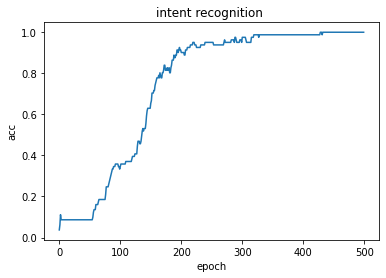

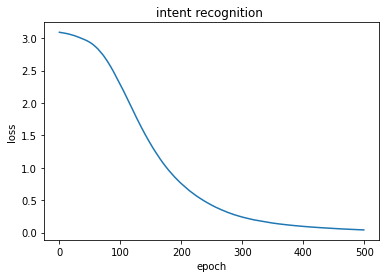

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(500),history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('intent recognition ')
plt.show()

plt.plot(range(500),history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('intent recognition ')
plt.show()

In [ ]:
model.save("chat_model")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model/assets


In [ ]:
!pip install colorama

In [ ]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)
    
     # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])
        for i in range(len(data['label'])):
            if data['label'][i] == tag: 
                result = random.choice(list(data['text'].loc[data['label'] == data['label'][i]]))
                print("RESPONSE:", result)
                break
        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: Hi
RESPONSE: Hi there
User: How are you
RESPONSE: How are you?
User: Fine. Thanks
RESPONSE: OK thanks
User: what are you doing
RESPONSE: Who do you think I am?
User: why so rude
RESPONSE: Why
User: okay bye
RESPONSE: Bye
User: OMG you're sensitive
RESPONSE: Hola
User: Bye
RESPONSE: Bye
User: 

KeyboardInterrupt: ignored